In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target

df['diagnosis'] = df['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

C:\Users\tream\AppData\Local\Temp\ipykernel_5148\4182255688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


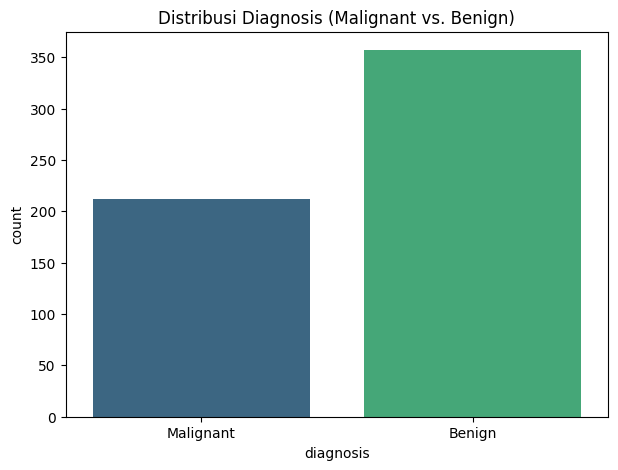

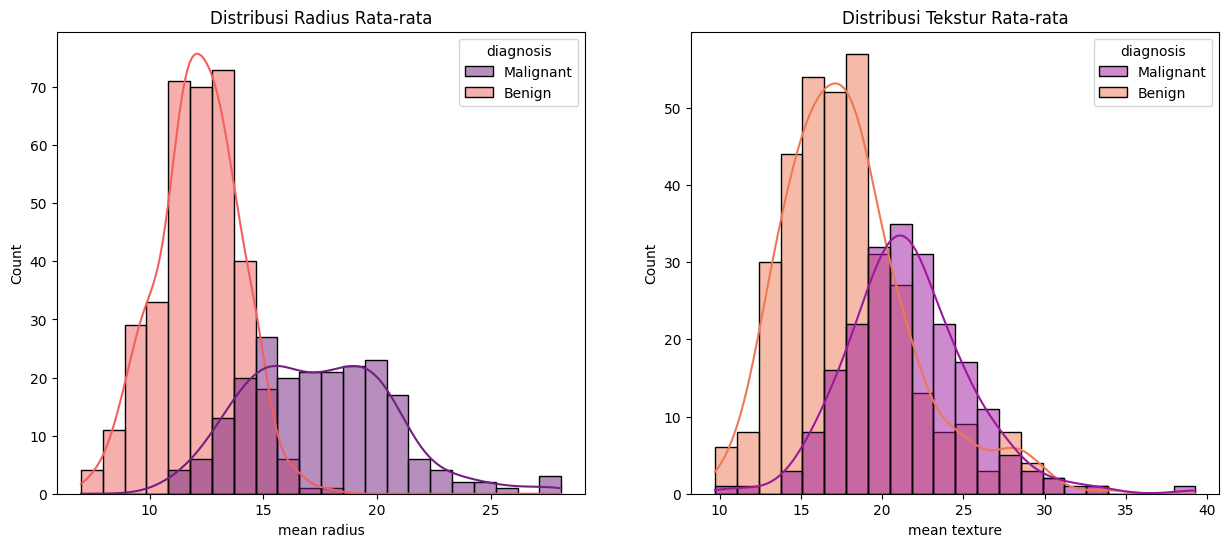

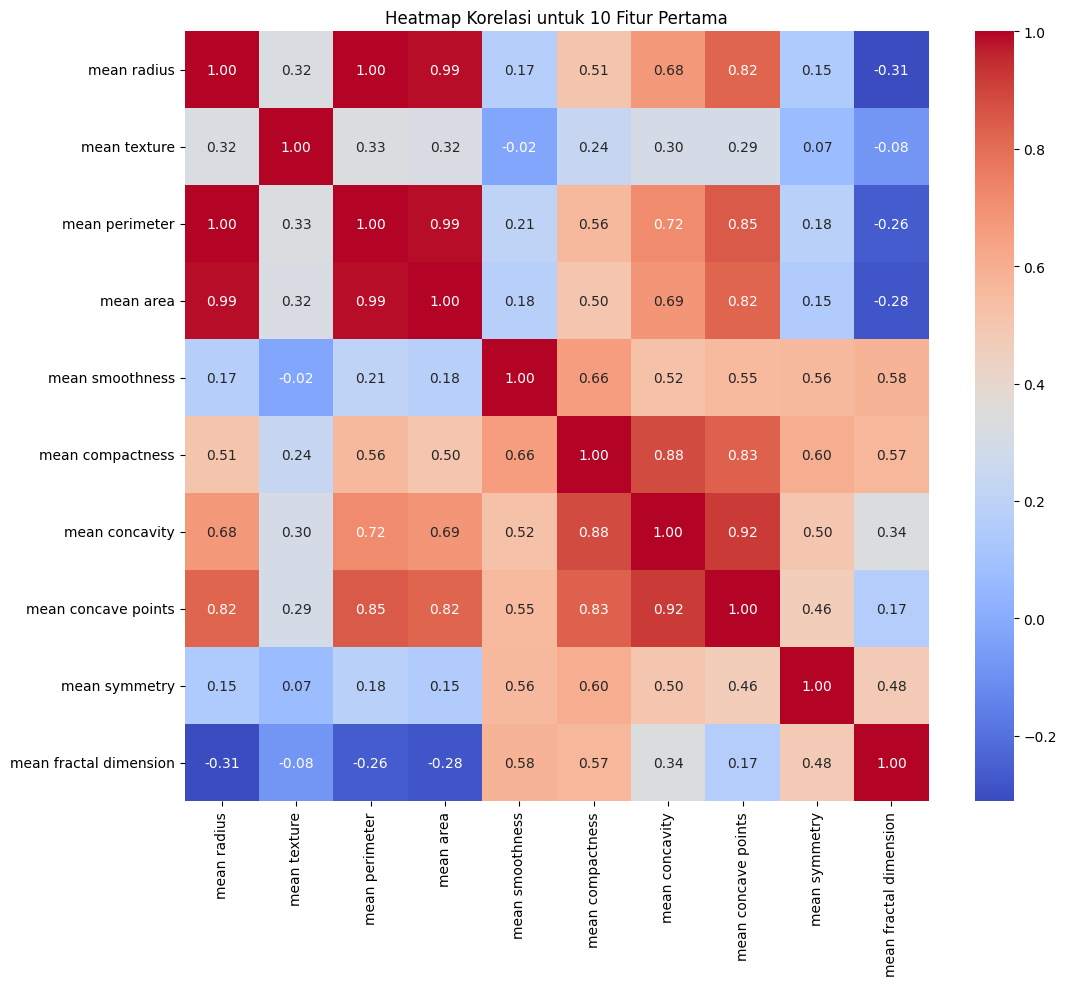

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribusi Diagnosis (Malignant vs. Benign)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df, x='mean radius', hue='diagnosis', kde=True, ax=axes[0], palette='magma')
axes[0].set_title('Distribusi Radius Rata-rata')
sns.histplot(df, x='mean texture', hue='diagnosis', kde=True, ax=axes[1], palette='plasma')
axes[1].set_title('Distribusi Tekstur Rata-rata')
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi untuk 10 Fitur Pertama')
plt.show()

In [8]:
print("Jumlah nilai hilang per kolom:")
print(df.isnull().sum())

print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")

Jumlah nilai hilang per kolom:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

Jumlah baris duplikat: 0


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data training (X_train):", X_train.shape)
print("Ukuran data testing (X_test):", X_test.shape)
print("\nProporsi diagnosis di set training:")
print(y_train.value_counts(normalize=True))
print("\nProporsi diagnosis di set testing:")
print(y_test.value_counts(normalize=True))

Ukuran data training (X_train): (455, 30)
Ukuran data testing (X_test): (114, 30)

Proporsi diagnosis di set training:
diagnosis
Benign       0.626374
Malignant    0.373626
Name: proportion, dtype: float64

Proporsi diagnosis di set testing:
diagnosis
Benign       0.631579
Malignant    0.368421
Name: proportion, dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

print("Lima baris pertama data training setelah di-scaling:")
print(X_train_scaled_df.head())

print("\nRata-rata data training setelah di-scaling (seharusnya mendekati 0):")
print(X_train_scaled_df.mean().head())

Lima baris pertama data training setelah di-scaling:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.518559      0.891826        0.424632   0.383925        -0.974744   
1    -0.516364     -1.639710       -0.541349  -0.542961         0.476219   
2    -0.368118      0.455515       -0.388250  -0.402970        -1.432979   
3     0.205285      0.726168        0.400330   0.070612         0.243253   
4     1.243005      0.194195        1.210377   1.206652        -0.111442   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -0.689772       -0.688586            -0.398175      -1.039155   
1         -0.631834       -0.604281            -0.303075       0.521543   
2         -0.383927       -0.342175            -0.765459      -0.850857   
3          2.203585        2.256094             1.213233       0.818474   
4          0.051348        0.732962             0.713767      -0.427187   

   mean fractal dimension  ...  worst r